In [3]:
import os
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from operator import itemgetter

In [4]:
os.getcwd()

'/Users/Sophie/Documents/GitHub/Analysis_and_Modelling_Social_Interactions'

# 2009

## Load data

In [5]:
df2009 = pd.read_excel('European_electricity_network_vFinal.xlsx', sheet_name='2009')
df2009.head()


,Origin_Country,Country_Code,AL,AT,BA,BE,BG,CH,CZ,DE,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,TR
0,Albania,AL,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,425.0,0.0,0.0,0.0,0.0
1,Austria,AT,0.0,NaN,0.0,0.0,0.0,8653.0,262.0,7061.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2527.0,0.0,0.0
2,Bosnia and Herzegovina,BA,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,361.0,0.0,0.0,0.0,0.0
3,Belgium,BE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,3773.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bulgaria,BG,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,230.0,1184.0,0.0,0.0,0.0,0.0


In [6]:
df_elec2009 = df2009.drop(['Origin_Country'], axis=1)
df_elec2009.head()

,Country_Code,AL,AT,BA,BE,BG,CH,CZ,DE,DK,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,TR
0,AL,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,425.0,0.0,0.0,0.0,0.0
1,AT,0.0,NaN,0.0,0.0,0.0,8653.0,262.0,7061.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2527.0,0.0,0.0
2,BA,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,361.0,0.0,0.0,0.0,0.0
3,BE,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,3773.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BG,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,230.0,1184.0,0.0,0.0,0.0,0.0


## Sort and clean up data

In [7]:
# Convert the wide table to long table
Country_list = list(df_elec2009.columns)
df_elec2009 = df_elec2009.melt(id_vars=['Country_Code'], value_vars=(Country_list[1:]), var_name='Destination', value_name='Electricity_Flow')
df_elec2009.rename(columns={'Country_Code':'Origin'}, inplace=True)
df_elec2009.head()

,Origin,Destination,Electricity_Flow
0,AL,AL,NaN
1,AT,AL,0.0
2,BA,AL,0.0
3,BE,AL,0.0
4,BG,AL,0.0


In [8]:
# Sort the table based on origin country's name
df_elec2009.sort_values('Origin', inplace=True, ascending=True)
df_elec2009.reset_index(drop=True, inplace=True)

# Delete NAs (when Origin=Destination)
df_elec2009.dropna(axis=0, inplace=True) 

# Delete zero-value rows
df_elec2009 = df_elec2009[df_elec2009.Electricity_Flow != 0]
df_elec2009.head()

,Origin,Destination,Electricity_Flow
12,AL,GR,61.0
20,AL,ME,47.0
27,AL,RS,425.0
39,AT,SI,2527.0
40,AT,DE,7061.0


## Create the network

In [9]:
G2009 = nx.from_pandas_edgelist(df_elec2009, 
                                'Origin', 
                                'Destination', 
                                create_using = nx.DiGraph)

In [10]:
# pip install igraph
# pip install python-igraph
# pip install pycairo
# pip install cairocffi

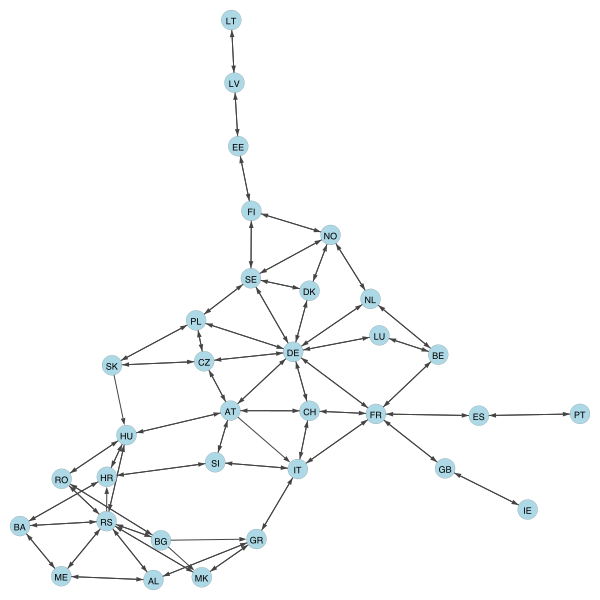

In [14]:
import igraph as ig
import pylab as plt

g_2009 = ig.Graph.from_networkx(G2009)
layout1 = g_2009.layout_kamada_kawai()
ig.plot(g_2009, 
        layout = layout1,
        vertex_label = G2009.nodes(), 
        #vertex_size = vertex_sizes,
        vertex_color = 'lightblue', 
        vertex_label_dist = 0,
        vertex_frame_width = 0.1,
        vertex_label_size = 9,
        edge_arrow_size = 0.5,
        edge_curved = False,
        directed=True)

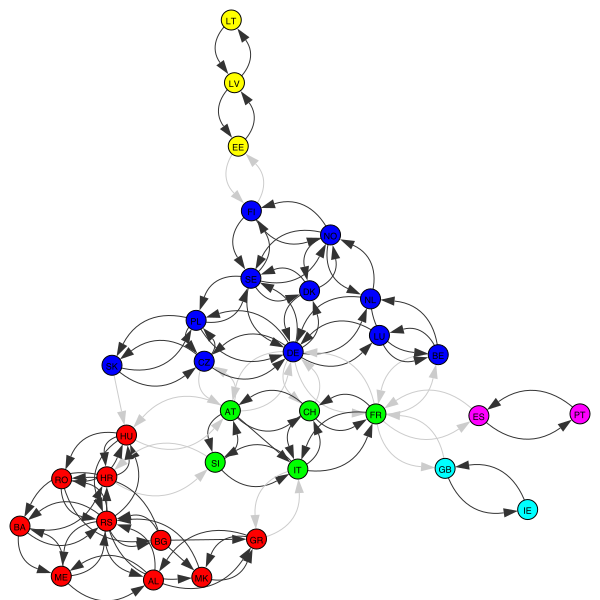

In [15]:
community2009 = g_2009.community_infomap()
ig.plot(community2009, 
        vertex_label = G2009.nodes(),
        vertex_label_size = 9,
        vertex_label_color = 'black',
       )

# 2014

In [16]:
df2014 = pd.read_excel('European_electricity_network_vFinal.xlsx', sheet_name='2014')
df2014.head()
df_elec2014 = df2014.drop(['Origin_Country'], axis=1)
df_elec2014.head()

,Country_Code,AL,AT,BA,BE,BG,CH,CZ,DE,DK,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,TR
0,AL,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,165.0,0.0,0.0,0.0,0.0
1,AT,0.0,NaN,0.0,0.0,0.0,5821,263.0,5484.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3119.0,0.0,0.0
2,BA,0.0,0.0,NaN,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,614.0,0.0,0.0,0.0,0.0
3,BE,0.0,0.0,0.0,NaN,0.0,0,0.0,0.0,0.0,...,3040.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BG,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,43.0,1514.0,0.0,0.0,0.0,5296.0


In [17]:
# Convert the wide table to long table
Country_list = list(df_elec2014.columns)
df_elec2014 = df_elec2014.melt(id_vars=['Country_Code'], value_vars=(Country_list[1:]), var_name='Destination', value_name='Electricity_Flow')
df_elec2014.rename(columns={'Country_Code':'Origin'}, inplace=True)
df_elec2014.head()
# Sort the table based on origin country's name
df_elec2014.sort_values('Origin', inplace=True, ascending=True)
df_elec2014.reset_index(drop=True, inplace=True)

# Delete NAs (when Origin=Destination)
df_elec2014.dropna(axis=0, inplace=True) 

# Delete zero-value rows
df_elec2014 = df_elec2014[df_elec2014.Electricity_Flow != 0]
df_elec2014.head()

,Origin,Destination,Electricity_Flow
12,AL,GR,104.0
20,AL,ME,145.0
27,AL,RS,165.0
39,AT,SI,3119.0
40,AT,DE,5484.0


In [18]:
G2014 = nx.from_pandas_edgelist(df_elec2014, 
                                'Origin', 
                                'Destination', 
                                create_using = nx.DiGraph)

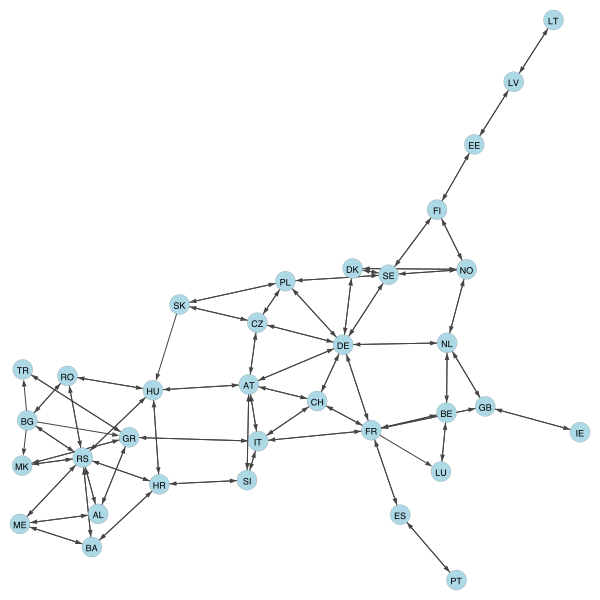

In [19]:
import igraph as ig
import pylab as plt

g_2014 = ig.Graph.from_networkx(G2014)
layout1 = g_2014.layout_kamada_kawai()
ig.plot(g_2014, 
        layout = layout1,
        vertex_label = G2014.nodes(), 
        vertex_color = 'lightblue', 
        vertex_label_dist = 0,
        vertex_frame_width = 0.1,
        vertex_label_size = 9,
        edge_arrow_size = 0.5,
        edge_curved = False,
        directed=True)

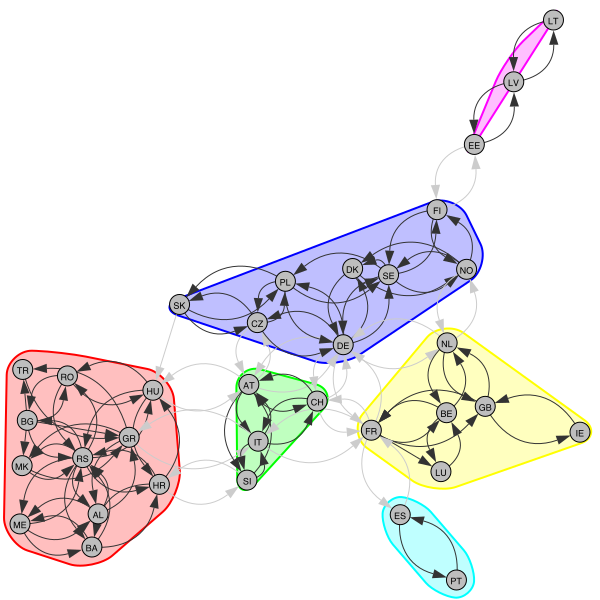

In [20]:
community2014 = g_2014.community_infomap()
ig.plot(community2014, 
        vertex_label = G2014.nodes(),
        vertex_label_size = 9,
        vertex_color = 'grey',
        mark_groups = True
       )

# 2018

In [21]:
df2018 = pd.read_excel('European_electricity_network_vFinal.xlsx', sheet_name='2018')
df2018.head()
df_elec2018 = df2018.drop(['Origin_Country'], axis=1)
df_elec2018.head()

,Country_Code,AL,AT,BA,BE,BG,CH,CZ,DE,DK,...,NL,NO,PL,PT,RO,RS,SE,SI,SK,TR
0,AL,NaN,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,880.0,0.0,0.0,0.0,0.0
1,AT,0.0,NaN,0.0,0.0,0.0,5595,112.0,4079.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4096.0,0.0,0.0
2,BA,0.0,0.0,NaN,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,488.0,0.0,0.0,0.0,0.0
3,BE,0.0,0.0,0.0,NaN,0.0,0,0.0,0.0,0.0,...,1776.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BG,0.0,0.0,0.0,0.0,NaN,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1213.0,2305.0,0.0,0.0,0.0,2058.0


In [22]:
# Convert the wide table to long table
Country_list = list(df_elec2018.columns)
df_elec2018 = df_elec2018.melt(id_vars=['Country_Code'], value_vars=(Country_list[1:]), var_name='Destination', value_name='Electricity_Flow')
df_elec2018.rename(columns={'Country_Code':'Origin'}, inplace=True)
df_elec2018.head()
# Sort the table based on origin country's name
df_elec2018.sort_values('Origin', inplace=True, ascending=True)
df_elec2018.reset_index(drop=True, inplace=True)

# Delete NAs (when Origin=Destination)
df_elec2018.dropna(axis=0, inplace=True) 

# Delete zero-value rows
df_elec2018 = df_elec2018[df_elec2018.Electricity_Flow != 0]
df_elec2018.head()

,Origin,Destination,Electricity_Flow
12,AL,GR,1061.0
20,AL,ME,742.0
27,AL,RS,880.0
39,AT,SI,4096.0
40,AT,DE,4079.0


In [23]:
G2018 = nx.from_pandas_edgelist(df_elec2018, 
                                'Origin', 
                                'Destination', 
                                create_using = nx.DiGraph)

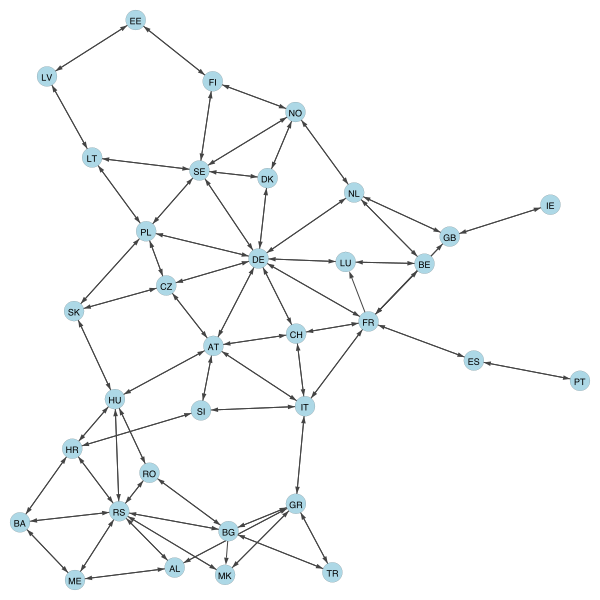

In [24]:
import igraph as ig
import pylab as plt

g_2018 = ig.Graph.from_networkx(G2018)
layout1 = g_2018.layout_kamada_kawai()
ig.plot(g_2018, 
        layout = layout1,
        vertex_label = G2018.nodes(), 
        #vertex_size = vertex_sizes,
        vertex_color = 'lightblue', 
        vertex_label_dist = 0,
        vertex_frame_width = 0.1,
        vertex_label_size = 9,
        edge_arrow_size = 0.5,
        edge_curved = False,
        directed=True)

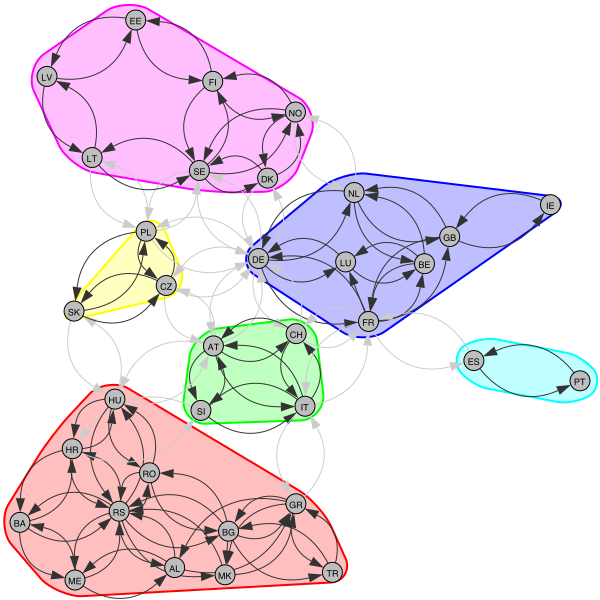

In [25]:
community2018 = g_2018.community_infomap()
ig.plot(community2018, 
        vertex_label = G2018.nodes(),
        vertex_label_size = 9,
        vertex_color = 'grey',
        mark_groups = True
       )

[['AL', 'HU', 'TR', 'ME', 'BG', 'MK', 'RO', 'GR', 'BA', 'HR', 'RS'], ['AT', 'SE', 'DK', 'EE', 'PT', 'NL', 'CZ', 'ES', 'LU', 'SK', 'SI', 'IT', 'GB', 'FI', 'IE', 'PL', 'DE', 'LT', 'CH', 'BE', 'LV', 'FR', 'NO']]


/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


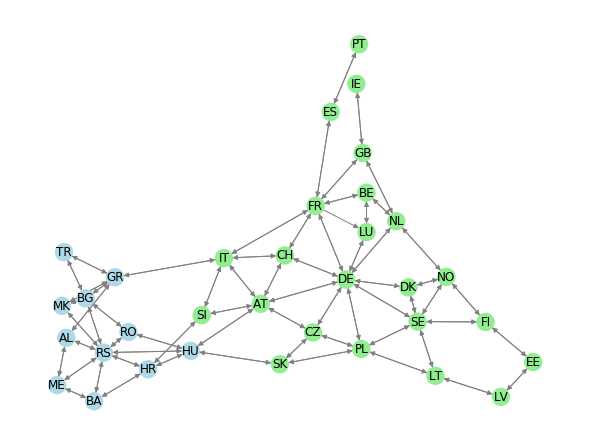

In [26]:
##Girvan-Newman algorithm
from networkx.algorithms.community.centrality import girvan_newman
communities = girvan_newman(G2018)

node_groups = []
for com in next(communities):
    node_groups.append(list(com))

print(node_groups)
color_map = []
for node in G2018:
    if node in node_groups[0]:
        color_map.append('lightblue')
    elif node in node_groups[1]:
        color_map.append('lightgreen')
    elif node in node_groups[2]:
        color_map.append('yellow')
    elif node in node_groups[3]:
        color_map.append('lightpink')
plt.figure(figsize=(8,6))
nx.draw(G2018, node_color=color_map, edge_color='gray', style = "solid", width=1, with_labels=True)
plt.show()